# Statistical Tests Tutorial

### Imports

In [42]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Generate Normally Distributed Data

In [76]:
# Generate data
np.random.seed(42)

sample_size = 1200
mu = 50
sigma = 10
data = np.random.normal(loc=mu, scale=sigma, size=sample_size)

In [77]:
data

array([54.96714153, 48.61735699, 56.47688538, ..., 55.52489954,
       52.23914134, 63.6414043 ])

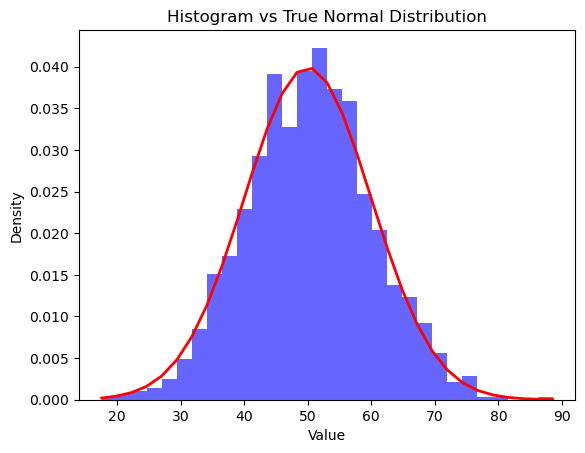

In [4]:
# Plot the histogram and true distribution
count, bins, ignored = plt.hist(data, bins=30, density=True, alpha=0.6, color='blue')

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *         
         np.exp(-(bins - mu)**2 / (2 * sigma**2)),         
         linewidth=2, color='red')

plt.title('Histogram vs True Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

### 2. Z-test for One Mean (σ known)
### We assume that the population variance is known.
### - $H_0$: $\mu = 50$
### - $H_1$: $\mu \neq 50$

### Manually Calculate the Z-statistic and p-value

In [5]:
sample_mean = np.mean(data)
standard_error = sigma / np.sqrt(sample_size)
z_statistic = (sample_mean - mu) / standard_error

alpha = 0.05

# inverse cdf
z_critical = stats.norm.ppf(1 - alpha/2)

# in each side we get p-value/2, thats why we multiply by 2
p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic)))

print(f"Sample mean: {sample_mean:.2f}")
print(f"Z-statistic (manual calculation): {z_statistic:.2f}")
print(f"Critical value for 95% confidence: ±{z_critical:.2f}")
print(f"P-value (manual calculation): {p_value:.4f}")

Sample mean: 50.38
Z-statistic (manual calculation): 1.33
Critical value for 95% confidence: ±1.96
P-value (manual calculation): 0.1837


### Visualize the Rejection Regions

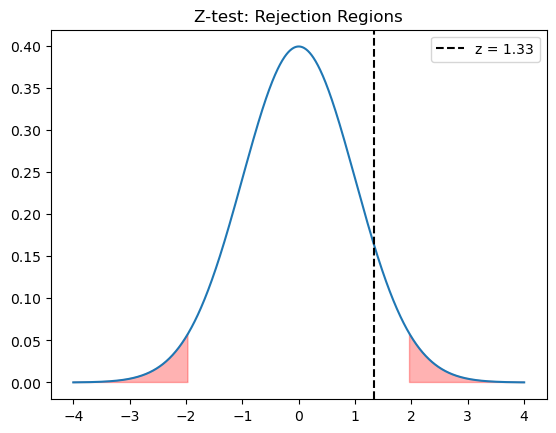

In [6]:
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x)

plt.plot(x, y)
plt.fill_between(x, 0, y, where=(x <= -z_critical) | (x >= z_critical), color='red', alpha=0.3)
plt.axvline(z_statistic, color='black', linestyle='--', label=f'z = {z_statistic:.2f}')
plt.title('Z-test: Rejection Regions')
plt.legend()
plt.show()

### Interpretation

In [78]:
if abs(z_statistic) > z_critical:
    print("Reject the null hypothesis.")
else:    
    print("Fail to reject the null hypothesis.")

Fail to reject the null hypothesis.


### 3. One-sample t-test (σ unknown)
### Now assume the population standard deviation is unknown.
### - $H_0$: $\mu = 50$
### - $H_1$: $\mu \neq 50$

### Manually Calculate the T-statistic and p-value

In [80]:
# unbiased version (with n-1): S
sample_std = np.std(data, ddof=1)

standard_error = sample_std / np.sqrt(sample_size)

t_statistic = (sample_mean - mu) / standard_error


t_critical = stats.t.ppf(1 - alpha/2, df=sample_size-1)

p_value_t = 2 * (1 - stats.t.cdf(abs(t_statistic), df=sample_size-1))

print(f"Sample std: {sample_std:.2f}")
print(f"T-statistic (manual calculation): {t_statistic:.2f}")
print(f"Critical t-value (df={sample_size-1}): ±{t_critical:.2f}")
print(f"P-value (manual calculation): {p_value_t:.4f}")

Sample std: 9.88
T-statistic (manual calculation): 1.35
Critical t-value (df=1199): ±1.96
P-value (manual calculation): 0.1788


### Visualize the Rejection Regions

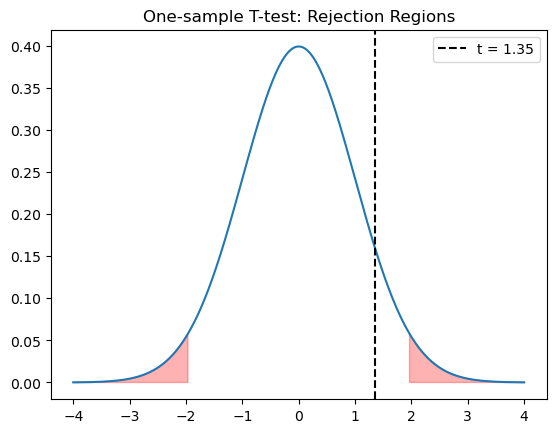

In [81]:
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df=sample_size-1)

plt.plot(x, y)
plt.fill_between(x, 0, y, where=(x <= -t_critical) | (x >= t_critical), color='red', alpha=0.3)
plt.axvline(t_statistic, color='black', linestyle='--', label=f't = {t_statistic:.2f}')
plt.title('One-sample T-test: Rejection Regions')
plt.legend()
plt.show()

### Interpretation

In [82]:
if abs(t_statistic) > t_critical:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Fail to reject the null hypothesis.


### 4. Two-sample Independent t-test (Equal Variances Assumed)
### We compare two independent groups.
### - $H_0$: $\mu_1 = \mu_2$
### - $H_1$: $\mu_1 \neq \mu_2$
### **Assumption**: The population variances are equal.
### *Note: If you are unsure whether variances are equal, it is safer to use Welch's t-test by setting `equal_var=False`.*

### Generate two groups

In [84]:
np.random.seed(123)

group1 = np.random.normal(loc=53, scale=10, size=100)
group2 = np.random.normal(loc=50, scale=10, size=100)

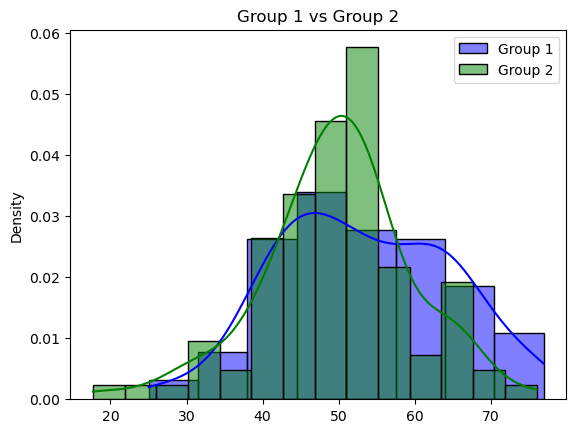

In [85]:
# Visualize the two groups
sns.histplot(group1, kde=True, color='blue', label='Group 1', stat='density')
sns.histplot(group2, kde=True, color='green', label='Group 2', stat='density')

plt.title('Group 1 vs Group 2')

plt.legend()

plt.show()

### Manually Calculate the T-statistic and p-value

In [86]:
mean1 = np.mean(group1)
mean2 = np.mean(group2)

var1 = np.var(group1, ddof=1)
var2 = np.var(group2, ddof=1)

n1 = len(group1)
n2 = len(group2)

# Pooled standard deviation: S_p that we calculated
pooled_var = ((n1-1)*var1 + (n2-1)*var2) / (n1+n2-2)
pooled_std = np.sqrt(pooled_var)

# T statistic
t_statistic = (mean1 - mean2) / (pooled_std * np.sqrt(1/n1 + 1/n2))

# degrees of freedom
df = n1 + n2 - 2

# critical value
t_critical = stats.t.ppf(1 - alpha/2, df=df)

# p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=df))

print(f"Group 1 mean: {mean1:.2f}, Group 2 mean: {mean2:.2f}")
print(f"Pooled standard deviation: {pooled_std:.2f}")
print(f"T-statistic (manual calculation): {t_statistic:.2f}")
print(f"Critical t-value (df={df}): ±{t_critical:.2f}")
print(f"P-value (manual calculation): {p_value:.4f}")

Group 1 mean: 53.27, Group 2 mean: 49.80
Pooled standard deviation: 10.57
T-statistic (manual calculation): 2.32
Critical t-value (df=198): ±1.97
P-value (manual calculation): 0.0215


In [89]:
# Using scipy.stats to verify the manual calculation
t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
print(f"\nSciPy t-test: t={t_stat:.2f}, p={p_val:.10e}")
print(f"Results match manual calculation: {abs(t_statistic - t_stat) < 1e-10}")


SciPy t-test: t=2.32, p=2.1491924621e-02
Results match manual calculation: True


### Visualize the Rejection Regions

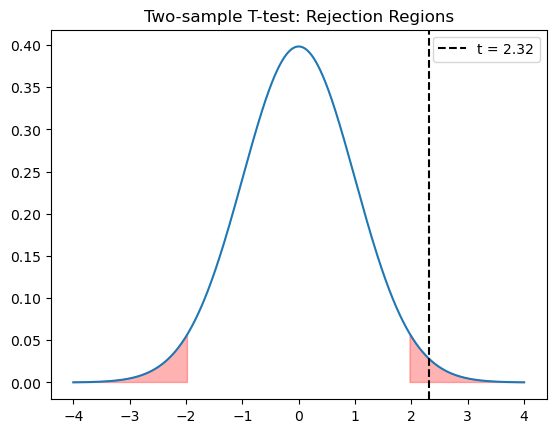

In [75]:
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df=df)

plt.plot(x, y)
plt.fill_between(x, 0, y, where=(x <= -t_critical) | (x >= t_critical), color='red', alpha=0.3)
plt.axvline(t_statistic, color='black', linestyle='--', label=f't = {t_statistic:.2f}')
plt.title('Two-sample T-test: Rejection Regions')
plt.legend()
plt.show()

### Interpretation

In [57]:
if abs(t_statistic) > t_critical:
    print("Reject the null hypothesis: The two group means are different.")
else:
    print("Fail to reject the null hypothesis: No evidence that the group means are different.")

Reject the null hypothesis: The two group means are different.


## Summary:
## - We practiced Z-test (known variance).
## - We practiced One-sample t-test (unknown variance).
## - We practiced Two-sample independent t-test assuming equal variances.
## - We manually calculated test statistics and p-values.
## - We visualized the rejection regions and critical values.
## - Important: If you are not sure about equal variances, use Welch's t-test.